# Tabular Playground Series - Feb 2022

# Data overview

In [17]:
# Import all the tools
from tqdm.notebook import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")


# plots inside the notebook
%matplotlib inline

In [30]:
train = pd.read_csv("/home/mikhail/data/train.csv")
# Y = train.target
test = pd.read_csv("/home/mikhail/data/test.csv")
# test_ID = test.ID

In [31]:
# train.head(3)

In [32]:
# test.head(3)

In [33]:
print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (200000, 288)
test shape: (100000, 287)


In [34]:
train['target'].value_counts()

Bacteroides_fragilis        20139
Streptococcus_pyogenes      20076
Streptococcus_pneumoniae    20074
Campylobacter_jejuni        20063
Salmonella_enterica         20030
Escherichia_coli            19958
Enterococcus_hirae          19947
Escherichia_fergusonii      19937
Staphylococcus_aureus       19929
Klebsiella_pneumoniae       19847
Name: target, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

train['target_cols'] = label.fit_transform(train['target'])
train.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,target_cols
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,6
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica,6
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica,6
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae,2


In [36]:
train.drop_duplicates(keep='first', inplace=True)
X = train.drop(columns = ['target', 'target_cols'], axis =1)
y = train['target_cols']
X.drop('row_id', inplace = True, axis =1)

In [37]:
print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (200000, 289)
test shape: (100000, 287)


In [10]:
# shuffle data
# X = X.sample(frac = 1)
# test = train.sample(frac = 1)

In [11]:
# Number of NaNs for each object
train.isnull().sum(axis=1).head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [12]:
# Number of NaNs for each column
train.isnull().sum(axis=0).head(15)

row_id       0
A0T0G0C10    0
A0T0G1C9     0
A0T0G2C8     0
A0T0G3C7     0
A0T0G4C6     0
A0T0G5C5     0
A0T0G6C4     0
A0T0G7C3     0
A0T0G8C2     0
A0T0G9C1     0
A0T0G10C0    0
A0T1G0C9     0
A0T1G1C8     0
A0T1G2C7     0
dtype: int64

No nan values. Check types:

In [13]:
train.dtypes

row_id           int64
A0T0G0C10      float64
A0T0G1C9       float64
A0T0G2C8       float64
A0T0G3C7       float64
                ...   
A9T0G1C0       float64
A9T1G0C0       float64
A10T0G0C0      float64
target          object
target_cols      int64
Length: 289, dtype: object

# EDA

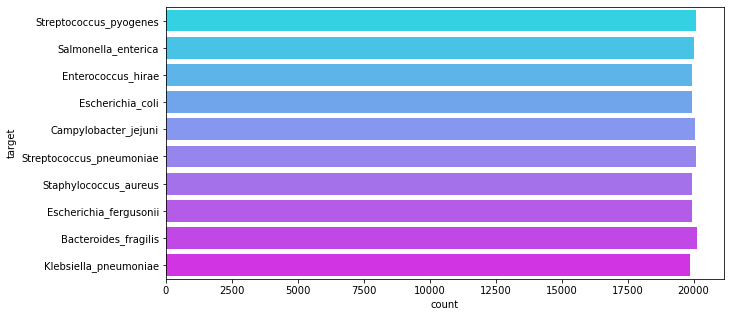

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(y=train['target'], palette='cool', orient='h')
plt.show()

In [15]:
nunique = train.nubnique(dropna=False)
nunique

AttributeError: 'DataFrame' object has no attribute 'nubnique'

In [ ]:
plt.figure(figsize=(10,6))
_ = plt.hist(nunique.astype(float)/train.shape[0], bins=100)

# FE

In [42]:
XI = IterativeImputer(X)
XI

IterativeImputer(estimator=           A0T0G0C10      A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  \
0      -9.536743e-07 -9.536743e-06 -0.000043 -0.000114 -0.000200 -0.000240   
1      -9.536743e-07 -9.536743e-06 -0.000043  0.000886 -0.000200  0.000760   
2      -9.536743e-07 -1.536743e-06  0.000007  0.000129  0.000268  0.000270   
3       4.632568e-08 -5.536743e-06  0.000012  0.000245  0.000492  0.000522   
4      -9.536743e-07 -9.536743e-06 -0.00...
199999  0.000053  0.000082  0.000102  0.000078  1.446326e-05  0.000013   

        A9T1G0C0     A10T0G0C0  
0      -0.000010 -9.536743e-07  
1      -0.000010 -9.536743e-07  
2       0.000019  1.046326e-06  
3       0.000046 -9.536743e-07  
4      -0.000010 -9.536743e-07  
...          ...           ...  
199995  0.000020 -9.536743e-07  
199996 -0.000010 -9.536743e-07  
199997  0.000021  4.632568e-08  
199998 -0.000010 -9.536743e-07  
199999  0.000033 -9.536743e-07  

[200000 rows x 286 columns])

# Modeling

In [44]:
N_SPLITS = 5
y_preds = []

folds = StratifiedKFold(n_splits=N_SPLITS, shuffle=True)

for fold, (train_id, test_id) in enumerate(folds.split(X, y)):
    X_train = X.iloc[train_id]
    y_train = y.iloc[train_id]
    X_valid = X.iloc[test_id]
    y_valid = y.iloc[test_id]

    model = KNeighborsClassifier(3)
    model.fit(X_train, y_train)

    valid_score = model.score(X_valid, y_valid)

    print(f'Fold: {fold + 1}')
    print(f'Training Accuracy   :- {(model.score(X_train, y_train)*100).round(2)}%')
    print(f'Validation Accuracy :- {(model.score(X_valid, y_valid)*100).round(2)}%')
    y_preds.append(model.predict(X_test))

Fold: 1
Training Accuracy   :- 99.27%
Validation Accuracy :- 97.58%


NameError: name 'X_test' is not defined

In [50]:
model = KNeighborsClassifier(3)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [51]:
model.score(X,y)

0.995665

In [60]:
# from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut
# from statistics import mean
# from catboost import CatBoostClassifier, cv# define folds to test

In [ ]:
# model = CatBoostClassifier(iterations=150)
# model.fit(X,y, plot=True)

In [ ]:
# model.score(X,y)

# Submitting

In [52]:
test = pd.read_csv("/home/mikhail/data/test.csv")
test.drop('row_id', inplace=True, axis =1)

In [53]:
y_preds_test = model.predict(test)
y_preds_test

array([4, 6, 2, ..., 0, 0, 9])

In [54]:
sample_sub = pd.read_csv('/home/mikhail/data/sample_submission.csv')
sample_sub.head(2)

,row_id,target
0,200000,Streptococcus_pneumoniae
1,200001,Streptococcus_pneumoniae


In [55]:
def save_submission(y_pred):  
    classes = label.inverse_transform(y_pred)
    sample_sub["target"] = classes
    assert len(classes) == sample_sub.shape[0]
    assert 2 == sample_sub.shape[1]   
    sample_sub.to_csv("/home/mikhail/Downloads/sample_submission.csv'", index=False)
    return sample_sub

In [56]:
save_submission(y_preds_test).head(3)

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
